# Autoencoder with MNIST

In this example we will train an autoencoder to encode images of hand-written digits to a low-dimensional representation and decode it back to its original representation. 

We will use the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) for this task. This dataset consists of 60 000 grayscale images of size 28x28. Hence, each image consists of 784 pixels.

The space of the encoder is called the latent space and we must specify the dimension of this (**encoding_dim**). A good choice for this problem is 32, which is a compression factor of 24.5 compared with the 784 dimensional input.

The autoencoder will have one hidden layer in the encoder and one hidden layer in the decoder.

In [0]:
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32  

input_img = Input(shape=(784,))
encoded = Dense(128, activation="relu")(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(128, activation="relu")(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Using TensorFlow backend.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [0]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layers = autoencoder.layers[-1](autoencoder.layers[-2](encoded_input))
# create the decoder model
decoder = Model(encoded_input, decoder_layers)

In [0]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_4 (Dense)              (None, 784)               101136    
Total params: 209,968
Trainable params: 209,968
Non-trainable params: 0
_________________________________________________________________


Once the data has been loaded we will normalize the pixel values to be between 0 and 1 and flatten the 28x28 images to be 1x784.

In [0]:
import numpy as np
np.random.seed(1)
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


We are now ready to train the model.

In [0]:
autoencoder.fit(x_train, x_train,
                epochs=40,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 6s 100us/step - loss: 0.2317 - val_loss: 0.1537
Epoch 2/40
60000/60000 [==============================] - 2s 27us/step - loss: 0.1376 - val_loss: 0.1229
Epoch 3/40
60000/60000 [==============================] - 2s 26us/step - loss: 0.1169 - val_loss: 0.1099
Epoch 4/40
60000/60000 [==============================] - 2s 28us/step - loss: 0.1084 - val_loss: 0.1047
Epoch 5/40
60000/60000 [==============================] - 2s 27us/step - loss: 0.1042 - val_loss: 0.1015
Epoch 6/40
60000/60000 [==============================] - 2s 27us/step - loss: 0.1013 - val_loss: 0.0987
Epoch 7/40
60000/60000 [==============================] - 2s 27us/step - loss: 0.0990 - val_loss: 0.0966
Epoch 8/40
60000/60000 [==============================] - 2s 26us/step - loss: 0.0972 - val_loss: 0.0952
Epoch 9/40
60000/60000 [==============================] - 2s 28us/step - loss: 0.0958 - val_loss: 0.0941
Epo

We can try the model by encoding and decoding some digits from the testset.

In [0]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

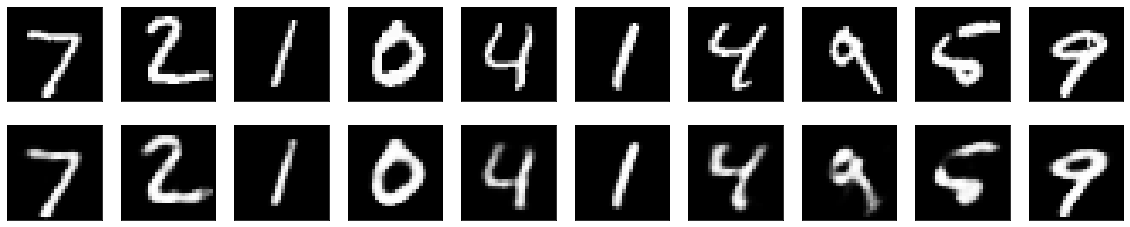

In [0]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

The latent space allows us to for example explore interpolations of a 4 and a 9.

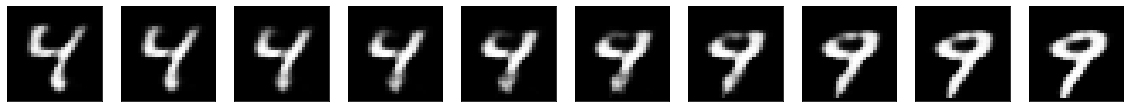

In [0]:
def showImage(pixels):
    image=pixels.reshape([28,28]) # Turn the list into a 2-dimensional array
    plt.imshow(image, cmap='gray_r') 
    plt.show()
    
n=10
latent=np.zeros((n, encoding_dim))
for i in range(n):
  latent[i]=i/n*encoded_imgs[9]+(n-i)/n*encoded_imgs[6]
  
  
latent_images=decoder.predict(latent)

plt.figure(figsize=(20, 4))
for i in range(n):

    # display reconstruction
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(latent_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Compare the interpolation in latent space with interpolation in image space.

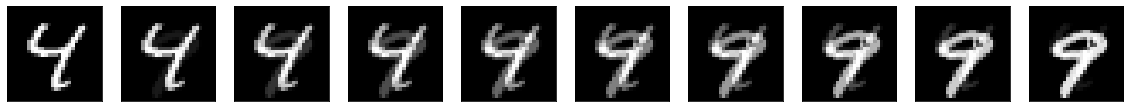

In [0]:
n=10
interpolated=np.zeros((n, 784))
for i in range(n):
  interpolated[i]=i/n*x_test[9]+(n-i)/n*x_test[6]

plt.figure(figsize=(20, 4))
for i in range(n):

    # display reconstruction
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(interpolated[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

This basic autoencoder does not really allow us to sample latent space and get something meaningful. For that we would need what is called a variational autoencoder. 

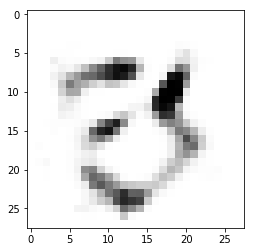

In [0]:
r=np.random.uniform(10, size=(1,encoding_dim))
i=decoder.predict(r)
showImage(i)